<a href="https://colab.research.google.com/github/Vanessa-Helena/IC-InteligenciaComputacional/blob/main/SistemaRh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício de Lógica Fuzzy


O módulo a ser desenvolvido neste trabalho representa um estudo de caso simples, que demonstra como é realizado o processo completo de modelagem de uma funcionalidade, utilizando Lógica Fuzzy.

* **Entrada (antecedentes):** 

> Experiência Expressa
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 30

>> Conjunto difuso (valores difusos): pouca, média, muita

> Tempo de Capacitação é Expresso
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 15

>> Conjunto difuso (valores difusos): fraca, media, forte


* **Saída (consequentes):**

> Gratificação

>> Universo (valores nítidos/*crisp*): 0,00 a 1.000,00

>> Conjunto difuso (valores difusos): muito baixa, baixa, média, alta, muito alta

### Regras de Decisão

> **SE** capacitação é "fraca" **E** a experiência é "pouca" **ENTÃO** a gratificação é "muito baixa"

> **SE** capacitação é "fraca" **E** a experiência é "média" **ENTÃO** a gratificação é "baixa"

> **SE** capacitação é "fraca" **E** a experiência é "muita" **ENTÃO** a gratificação é "média"

> **SE** capacitação é "média" **E** a experiência é "pouca" **ENTÃO** a gratificação é "baixa"

> **SE** capacitação é "média" **E** a experiência é "média" **ENTÃO** a gratificação é "média"

> **SE** capacitação é "média" **E** a experiência é "muita" **ENTÃO** a gratificação é "alta"

> **SE** capacitação é "forte" **E** a experiência é "pouca" **ENTÃO** a gratificação é "média"

> **SE** capacitação é "forte" **E** a experiência é "média" **ENTÃO** a gratificação é "alta"

> **SE** capacitação é "forte" **E** a experiência é "muita" **ENTÃO** a gratificação é "muito alta"



In [1]:
# Se necessário, instale o pacote skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy


     |████████████████████████████████| 1.7 MB 18.0 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=a36a64f191e27fe18de9466f328ab3607547cdbc6cd0dc0ae99bd522665c1536
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 993 kB 33.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=115d76b902ebaf7a7b45daf4ebbe82bd7767dd09ac634e6a871c0d78

In [37]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
experiencia = ctrl.Antecedent(np.arange(0, 30, 1), 'experiencia')
capacitacao = ctrl.Antecedent(np.arange(0, 15, 1), 'capacitacao')
gratificacao = ctrl.Consequent(np.arange(0, 1000, 1), 'gratificacao')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
experiencia.automf(names=['pouca', 'media', 'muita'])
capacitacao.automf(names=['fraca', 'media', 'forte'])
gratificacao.automf(names=['muito baixa', 'baixa', 'media', 'alta', 'muito alta'])

# Cria as funções de pertinência usando tipos variados
# capacitacao['fraca'] = fuzz.trimf(capacitacao.universe, [0, 0, 7.5])
# capacitacao['media'] = fuzz.trimf(capacitacao.universe, [0, 7.5, 15])
# capacitacao['forte'] = fuzz.trimf(capacitacao.universe, [7.5, 15, 15])

# gratificacao['muito baixa'] = fuzz.trimf(gratificacao.universe, [0, 0, 250])
# gratificacao['baixa'] = fuzz.trimf(gratificacao.universe, [0, 250, 500])
# gratificacao['média'] = fuzz.trimf(gratificacao.universe, [250,500, 750])
# gratificacao['alta'] = fuzz.trimf(gratificacao.universe, [500, 750, 1000])
# gratificacao['muito alta'] = fuzz.trimf(gratificacao.universe, [750, 1000, 1000])

### Mostrando graficamente as funções de partinência criadas

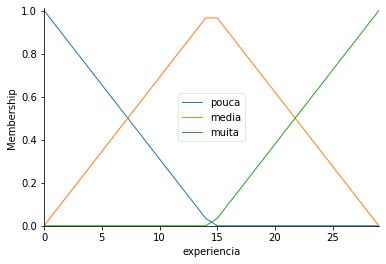

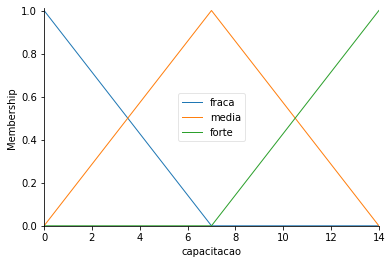

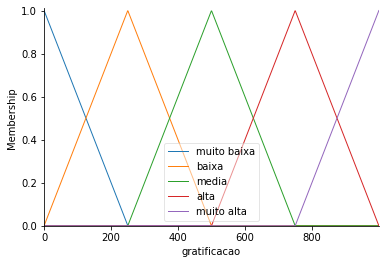

In [38]:
experiencia.view()
capacitacao.view()
gratificacao.view()


### Criando as regras de decisão difusas

In [44]:
rule1 = ctrl.Rule(capacitacao['fraca'] | experiencia['pouca'], gratificacao['muito baixa'])
rule2 = ctrl.Rule(capacitacao['media'] | experiencia['media'], gratificacao['media'])
rule3 = ctrl.Rule(capacitacao['forte'] | experiencia['muita'], gratificacao['muito alta'])

SE capacitação é "fraca" E a experiência é "pouca" ENTÃO a gratificação é "muito baixa"

SE capacitação é "fraca" E a experiência é "média" ENTÃO a gratificação é "baixa"

SE capacitação é "fraca" E a experiência é "muita" ENTÃO a gratificação é "média"

SE capacitação é "média" E a experiência é "pouca" ENTÃO a gratificação é "baixa"

SE capacitação é "média" E a experiência é "média" ENTÃO a gratificação é "média"

SE capacitação é "média" E a experiência é "muita" ENTÃO a gratificação é "alta"

SE capacitação é "forte" E a experiência é "pouca" ENTÃO a gratificação é "média"

SE capacitação é "forte" E a experiência é "média" ENTÃO a gratificação é "alta"

SE capacitação é "forte" E a experiência é "muita" ENTÃO a gratificação é "muito alta"

### Criando e simulando um controlador nebuloso

In [47]:
gratificacao_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
gratificacao_simulador = ctrl.ControlSystemSimulation(gratificacao_ctrl)

# Entrando com alguns valores para qualidade da capacitacao e do experiencia
gratificacao_simulador.input['capacitacao'] = 20
gratificacao_simulador.input['experiencia'] = 50

# Computando o resultado
gratificacao_simulador.compute()
print(gratificacao_simulador.output['gratificacao'])


915.7495000020043


### Mostrando graficamente o resultado

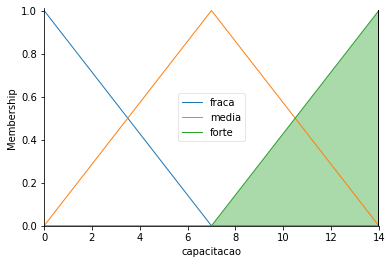

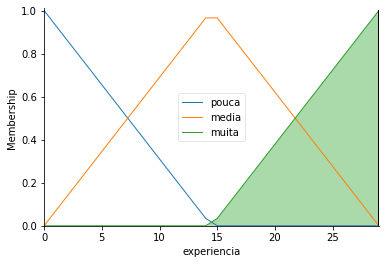

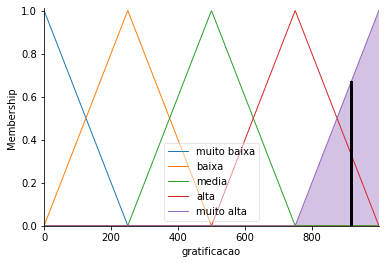

In [41]:
capacitacao.view(sim=gratificacao_simulador)
experiencia.view(sim=gratificacao_simulador)
gratificacao.view(sim=gratificacao_simulador)